In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,6

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('GDP.csv')
df.head()

,DATE,GDP
0,1/1/1947,243.164
1,4/1/1947,245.968
2,7/1/1947,249.585
3,10/1/1947,259.745
4,1/1/1948,265.742


In [3]:
df.tail()

,DATE,GDP
295,10/1/2020,21477.597
296,1/1/2021,22038.226
297,4/1/2021,22740.959
298,7/1/2021,23202.344
299,10/1/2021,23992.355


In [4]:
df.set_index('DATE', inplace = True)

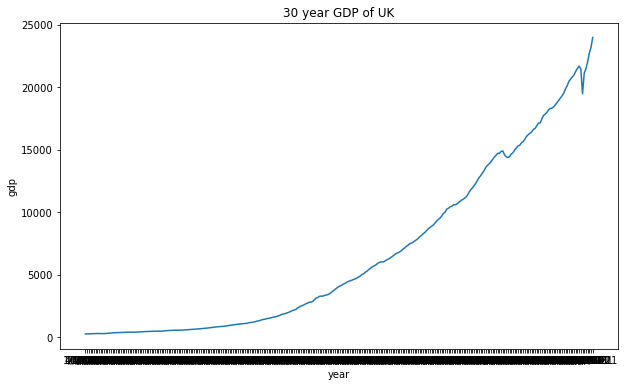

In [5]:
#plotting graph 
plt.xlabel('year')
plt.ylabel('gdp')
plt.title('30 year GDP of UK', fontsize = 12)
plt.plot(df)

In [6]:
# determining rolling statistics
rollmean = df.rolling(window = 4).mean()
rollstd = df.rolling(window = 4).std()
print(rollmean, rollstd)

                   GDP
DATE                  
1/1/1947           NaN
4/1/1947           NaN
7/1/1947           NaN
10/1/1947    249.61550
1/1/1948     255.26000
...                ...
10/1/2020  20893.74550
1/1/2021   21032.96025
4/1/2021   21848.83900
7/1/2021   22364.78150
10/1/2021  22993.47100

[300 rows x 1 columns]                    GDP
DATE                  
1/1/1947           NaN
4/1/1947           NaN
7/1/1947           NaN
10/1/1947     7.246466
1/1/1948      9.101913
...                ...
10/1/2020   957.780861
1/1/2021   1101.369774
4/1/2021    700.961845
7/1/2021    760.866893
10/1/2021   820.091966

[300 rows x 1 columns]


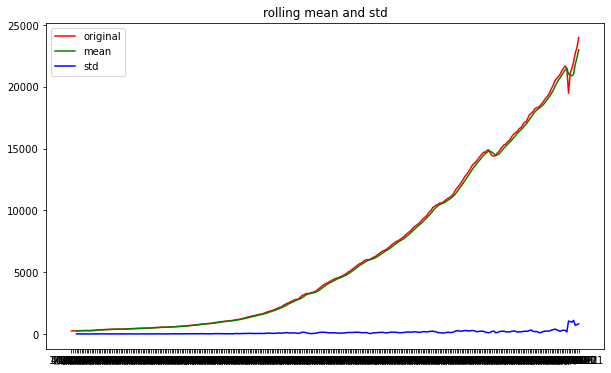

In [7]:
# ploting rolling statistics
orig = plt.plot(df, color = 'red', label = 'original')
mean = plt.plot(rollmean, color = 'green', label = 'mean')
std = plt.plot(rollstd, color = 'blue', label = 'std')
plt.title('rolling mean and std')
plt.legend();

data is not stationary

In [8]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['GDP'], autolag='AIC')


print(f'Test Statistics : {dftest[0]}')
print(f'p_value : ',dftest[1])
print(f'lags used : ',dftest[2])
print(f'Number of observation used',dftest[3])

Test Statistics : 5.254722351100752
p_value :  1.0
lags used :  9
Number of observation used 290


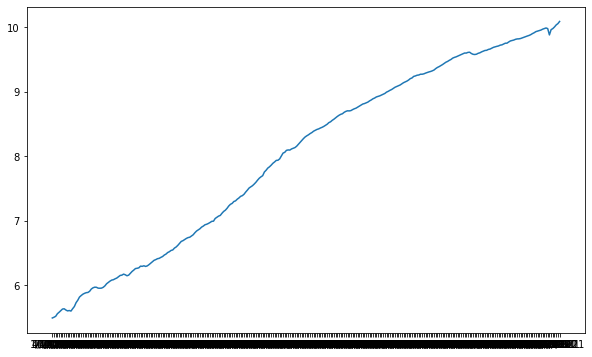

In [9]:
# estimation trend
data_log = np.log(df)
plt.plot(data_log)

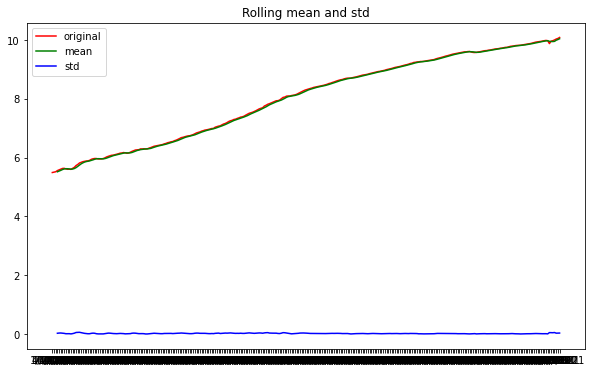

In [10]:
orig = plt.plot(data_log, color = 'red', label = 'original')
mean = plt.plot(data_log.rolling(window = 4).mean(), color = 'green', label = 'mean')
std = plt.plot(data_log.rolling(window = 4).std(), color = 'blue', label = 'std')
plt.title('Rolling mean and std')
plt.legend();

In [11]:
def test_stationarity(data):
    moving_avg = data.rolling(window = 12).mean()
    moving_std = data.rolling(window = 12).std()
    
    #plot rolling statistics
    plt.figure(figsize = (25,12))
    orig = plt.plot(data, color = 'red', label = 'original')
    mean = plt.plot(moving_avg, color = 'green', label = 'mean')
    std = plt.plot(moving_std, color = 'blue', label = 'std')
    plt.title('rolling mean and std')
    plt.legend()
    plt.show(block=False)
    
    #dicky fuller test
    dftest = adfuller(df['GDP'], autolag='AIC')


    print(f'Test Statistics : {dftest[0]}')
    print(f'p_value : ',dftest[1])
    print(f'lags used : ',dftest[2])
    print(f'Number of observation used',dftest[3])

In [12]:
data_log_mov_avg = data_log - (data_log.rolling(window = 4).mean())

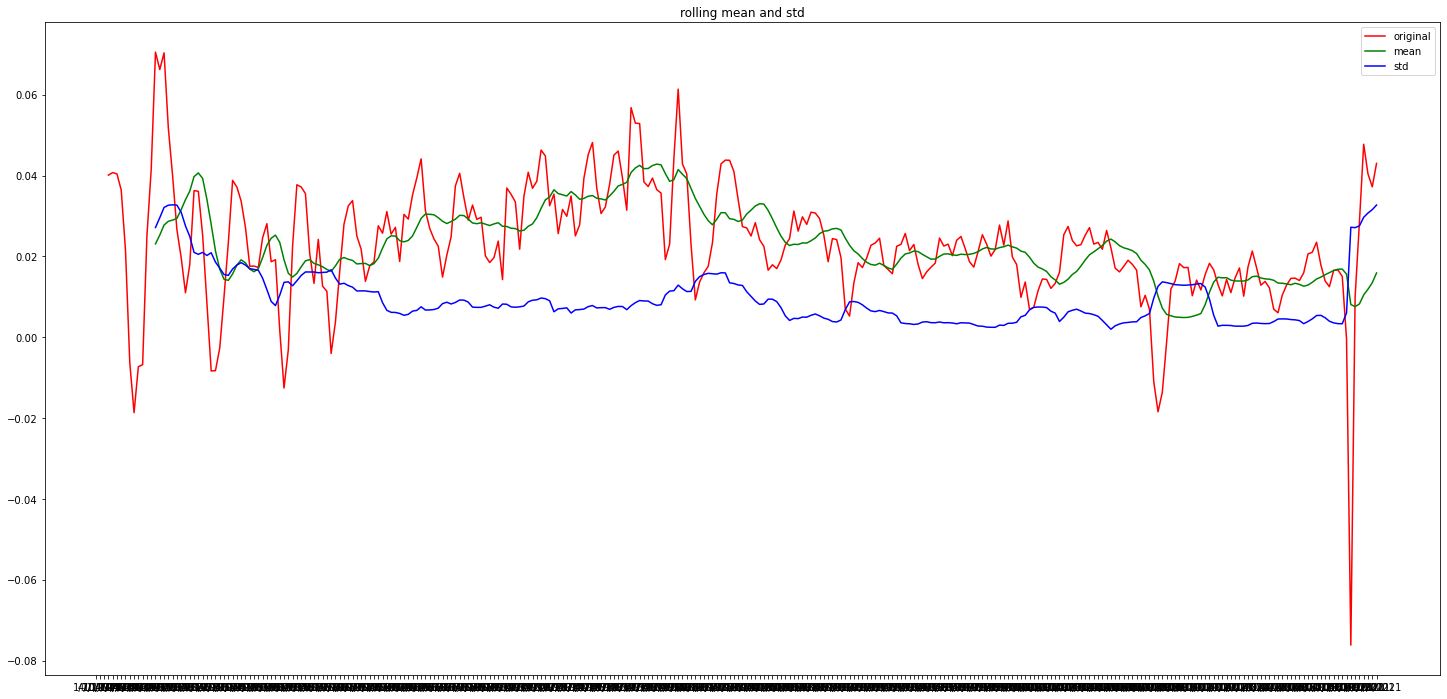

Test Statistics : 5.254722351100752
p_value :  1.0
lags used :  9
Number of observation used 290


In [13]:
test_stationarity(data_log_mov_avg)

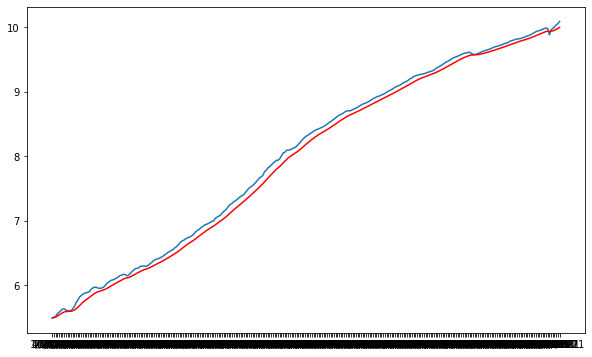

In [14]:
exponent_log_avg = data_log.ewm(halflife=4, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exponent_log_avg, color = 'red')

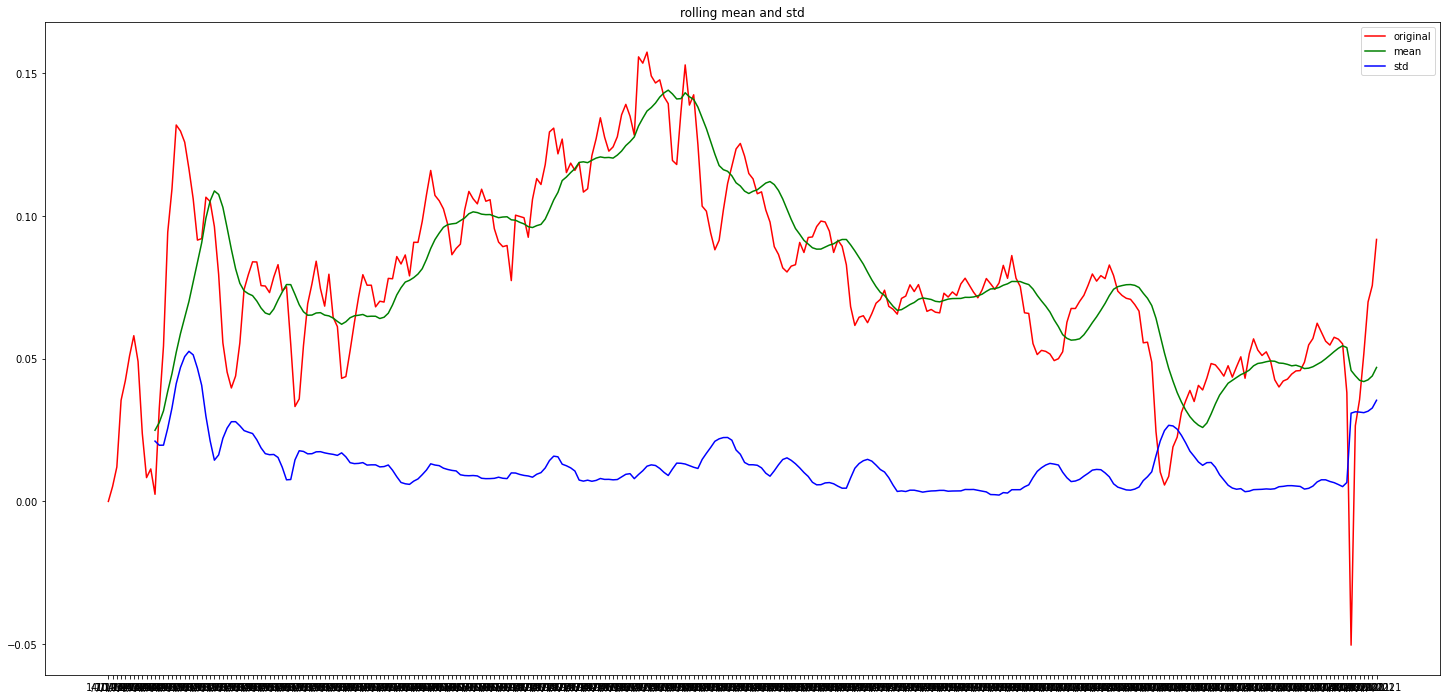

Test Statistics : 5.254722351100752
p_value :  1.0
lags used :  9
Number of observation used 290


In [15]:
log_scaled_moving_ex_avg = data_log - exponent_log_avg
test_stationarity(log_scaled_moving_ex_avg)

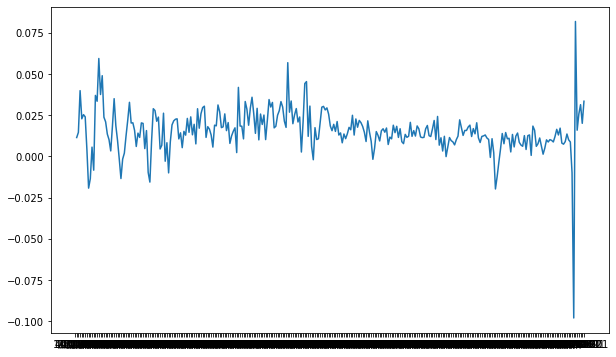

In [16]:
log_shift = data_log - data_log.shift()
plt.plot(log_shift)

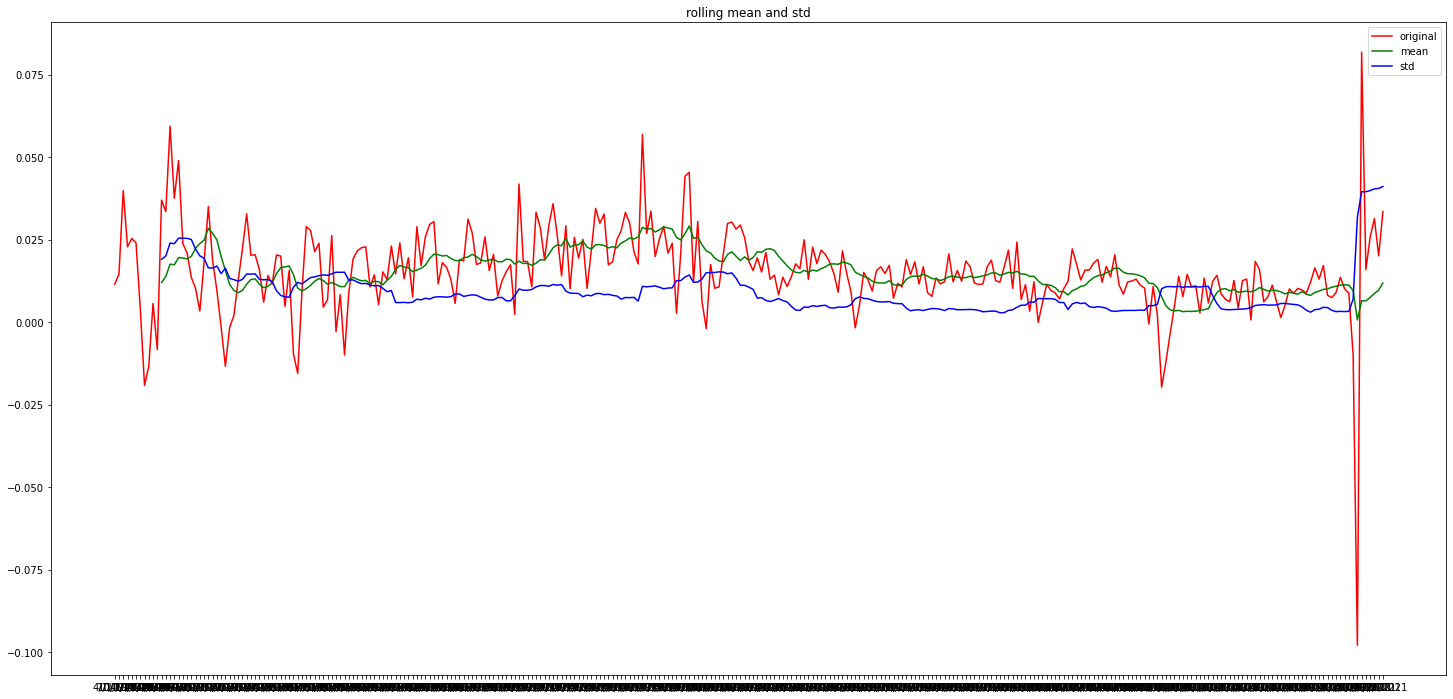

Test Statistics : 5.254722351100752
p_value :  1.0
lags used :  9
Number of observation used 290


In [17]:
log_shift.dropna(inplace = True)
test_stationarity(log_shift)

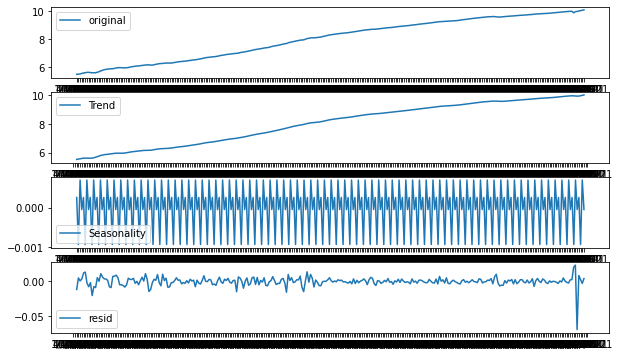

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(data_log, period = 4)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(data_log, label = 'original' )
plt.legend()

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend()

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend()

plt.subplot(414)
plt.plot(residual, label = 'resid')
plt.legend()

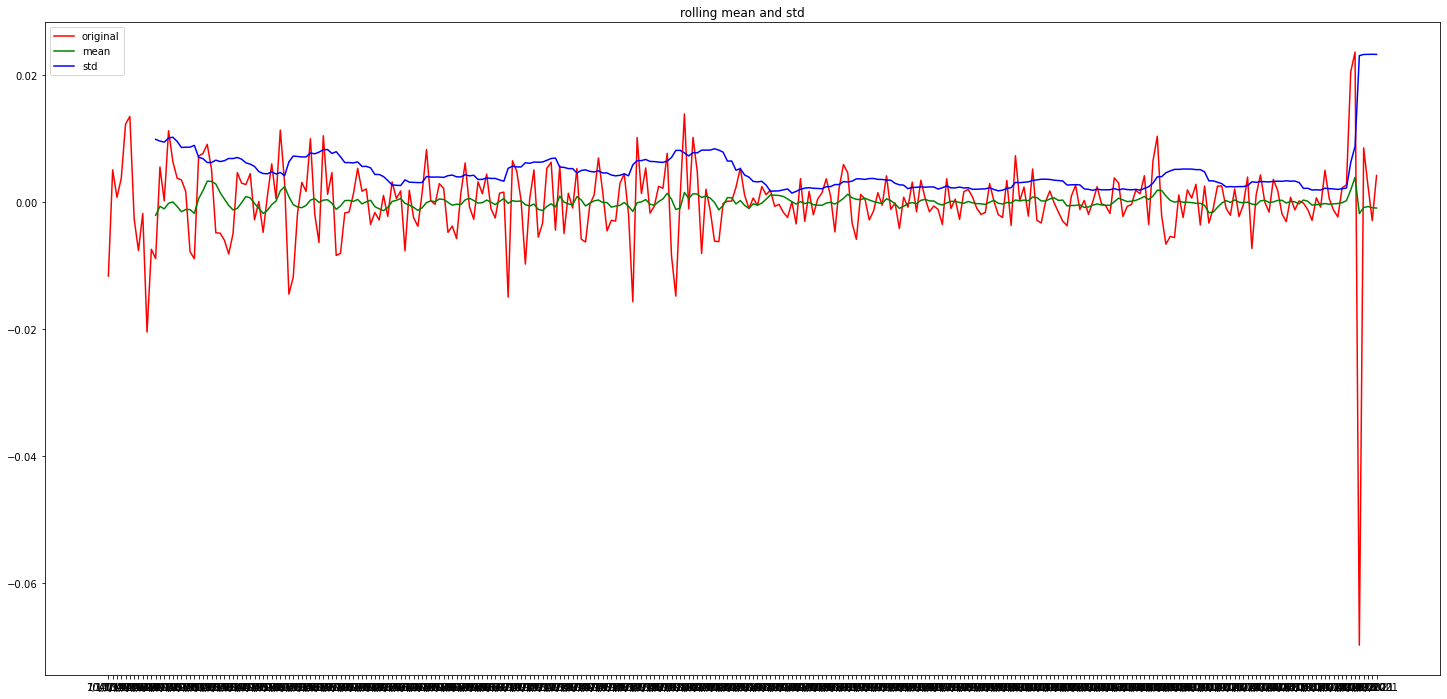

Test Statistics : 5.254722351100752
p_value :  1.0
lags used :  9
Number of observation used 290


In [19]:
decomp_log = residual
decomp_log.dropna(inplace = True)
test_stationarity(decomp_log)

In [20]:
from statsmodels.tsa.stattools import acf, pacf

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict

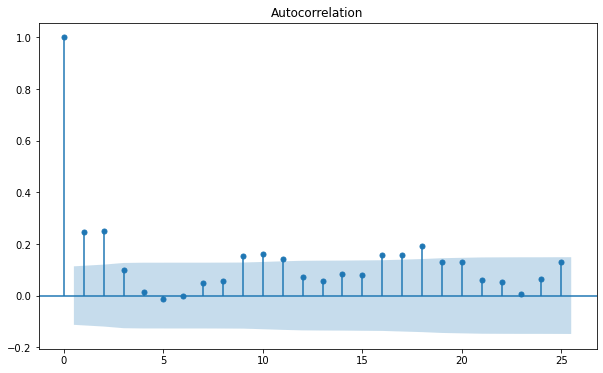

In [22]:
plot_acf(log_shift);


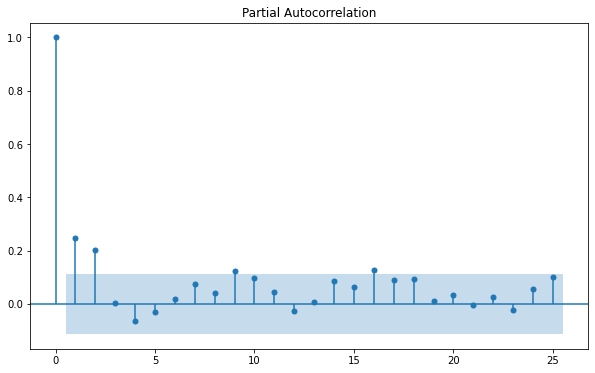

In [23]:
plot_pacf(log_shift);

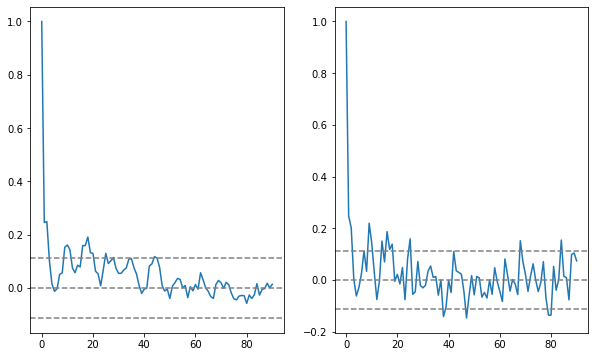

In [24]:
lag_acf = acf(log_shift, nlags = 90)
lag_pacf = pacf(log_shift, nlags = 90, method = 'ols')

#plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'grey')
plt.axhline(y = 1.96 / np.sqrt(len(log_shift)), linestyle = '--', color = 'grey')
plt.axhline(y = - 1.96 / np.sqrt(len(log_shift)), linestyle = '--', color = 'grey')

#plot pacf

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'grey')
plt.axhline(y = 1.96 / np.sqrt(len(log_shift)), linestyle = '--', color = 'grey')
plt.axhline(y = - 1.96 / np.sqrt(len(log_shift)), linestyle = '--', color = 'grey')

## ARIMA MODEL

In [25]:
data_log.index = pd.to_datetime(data_log.index)

In [26]:
data_log.index.freq = 'QS-OCT'

Text(0.5, 1.0, '5732899.800923125')

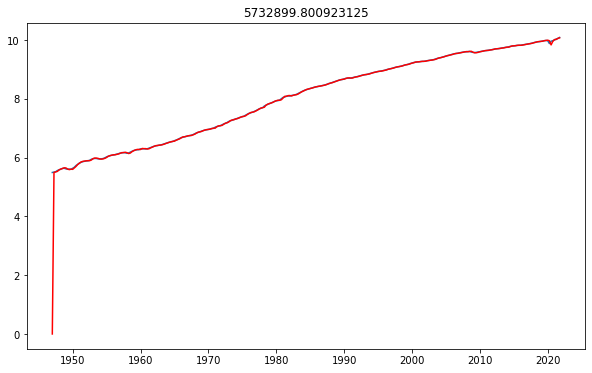

In [27]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data_log, order = (2,1,0))
result = model.fit()
plt.plot(data_log)
plt.plot(result.fittedvalues, color = 'red')
plt.title(sum(result.fittedvalues.values[1:] - log_shift['GDP'].values)**2)

In [28]:
result.fittedvalues - log_shift['GDP']

DATE
1947-01-01 00:00:00   NaN
1947-04-01 00:00:00   NaN
1947-07-01 00:00:00   NaN
1947-10-01 00:00:00   NaN
1948-01-01 00:00:00   NaN
                       ..
7/1/2017              NaN
7/1/2018              NaN
7/1/2019              NaN
7/1/2020              NaN
7/1/2021              NaN
Length: 599, dtype: float64

In [29]:
log_shift['GDP']

DATE
4/1/1947     0.011465
7/1/1947     0.014598
10/1/1947    0.039901
1/1/1948     0.022826
4/1/1948     0.025359
               ...   
10/1/2020    0.015911
1/1/2021     0.025768
4/1/2021     0.031389
7/1/2021     0.020086
10/1/2021    0.033482
Name: GDP, Length: 299, dtype: float64

In [30]:
result.fittedvalues.values[1:] - log_shift['GDP'].values

array([ 5.48227078,  5.49841004,  5.49045698,  5.55894678,  5.58258508,
        5.60337517,  5.64774145,  5.66673238,  5.62429834,  5.58451865,
        5.61421103,  5.56266234,  5.61588877,  5.64035163,  5.73065446,
        5.7584707 ,  5.82836585,  5.84940672,  5.86647364,  5.87924775,
        5.89185813,  5.87613569,  5.88100771,  5.94526472,  5.97304025,
        5.98357212,  5.98585173,  5.95136279,  5.94604444,  5.94376165,
        5.95249029,  5.97200882,  6.02560265,  6.04500727,  6.06493307,
        6.0887768 ,  6.08092785,  6.09697238,  6.10195909,  6.12512025,
        6.16384884,  6.1513925 ,  6.19070373,  6.1810089 ,  6.12781432,
        6.12550621,  6.17359511,  6.21538388,  6.2311223 ,  6.27268389,
        6.2682078 ,  6.24858628,  6.31271739,  6.29470335,  6.31405059,
        6.28239268,  6.28124708,  6.30971665,  6.33546934,  6.35914381,
        6.39464445,  6.39677445,  6.41664715,  6.40993042,  6.42782176,
        6.43366398,  6.46833517,  6.47428369,  6.50952831,  6.51

Text(0.5, 1.0, '5733333.625584778')

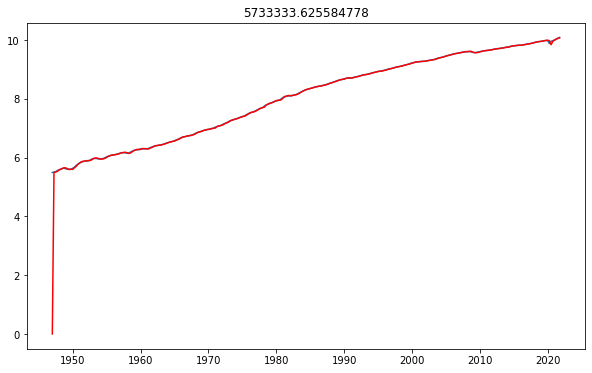

In [31]:
model = ARIMA(data_log, order = (4,1,2))
result = model.fit()
plt.plot(data_log)
plt.plot(result.fittedvalues, color = 'red')
plt.title(sum(result.fittedvalues.values[1:] - log_shift['GDP'].values)**2)

In [32]:
pred_arima_diff = pd.Series(result.fittedvalues, copy = True)
print(pred_arima_diff)

DATE
1947-01-01     0.000000
1947-04-01     5.493736
1947-07-01     5.512964
1947-10-01     5.530322
1948-01-01     5.580342
                ...    
2020-10-01     9.951910
2021-01-01     9.995259
2021-04-01    10.023654
2021-07-01    10.060947
2021-10-01    10.069489
Freq: QS-OCT, Length: 300, dtype: float64


In [33]:
pred_arima_cumsum = pred_arima_diff.cumsum()
print(pred_arima_cumsum.head())

DATE
1947-01-01     0.000000
1947-04-01     5.493736
1947-07-01    11.006700
1947-10-01    16.537021
1948-01-01    22.117364
Freq: QS-OCT, dtype: float64


In [34]:
pred_arima_log = pd.Series(data_log['GDP'].index[0], index = data_log.index)
#pred_arima_log = pred_arima_log.add(pred_arima_cumsum, fill_value = 0)
pred_arima_log.head()

DATE
1947-01-01   1947-01-01
1947-04-01   1947-01-01
1947-07-01   1947-01-01
1947-10-01   1947-01-01
1948-01-01   1947-01-01
Freq: QS-OCT, dtype: datetime64[ns]

In [35]:
#pred_arima = np.exp(pred_arima_log)
#plt.plot(df)
#plt.plot(pred_arima)

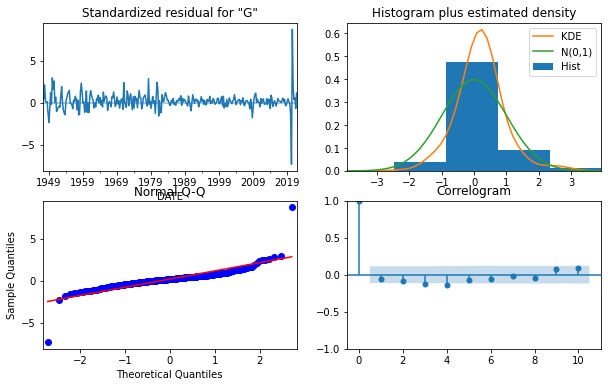

In [36]:
result.plot_diagnostics(variable = 0);

In [50]:
b = result.predict(1,350)

In [51]:
pd.DataFrame(b)

,0
1947-04-01,0.015268
1947-07-01,0.014432
1947-10-01,0.014613
1948-01-01,0.019830
1948-04-01,0.020867
...,...
2033-07-01,0.015067
2033-10-01,0.015102
2034-01-01,0.015206
2034-04-01,0.015322


In [52]:
b.to_csv('time_series.csv')

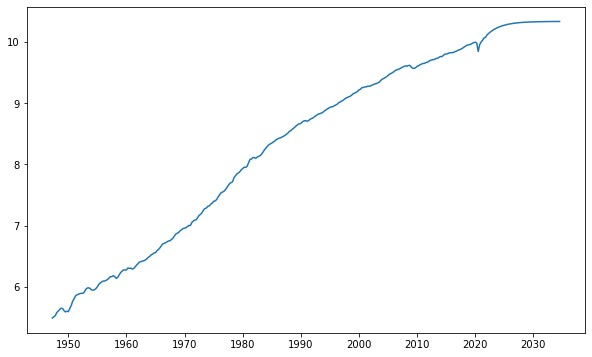

In [38]:
plt.plot(b)

In [39]:
a = result.forecast(steps = 120)

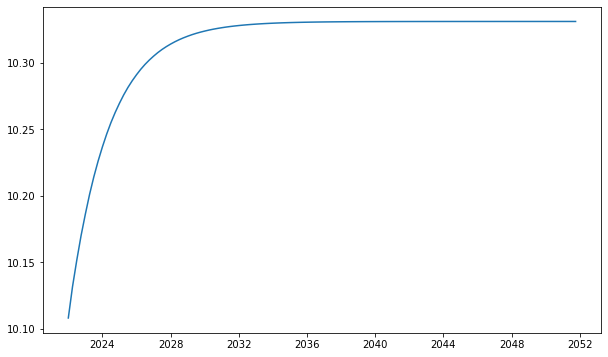

In [40]:
plt.plot(a)

In [41]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data_log, order = (2,1,2))
result = model.fit()


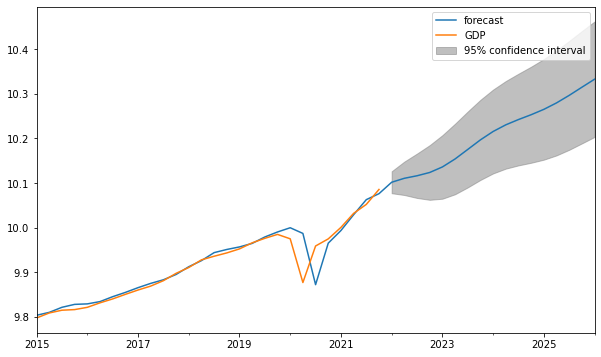

In [59]:
result.plot_predict( start ='01-01-2015', end = '01/01/2026' );

In [53]:
a = pd.read_csv('time_series.csv')

Index(['Unnamed: 0', '0'], dtype='object')

In [56]:
a.reset_index(inplace=True)

In [58]:
a.head()

,index,Unnamed: 0,0
0,0,1947-04-01,0.015268
1,1,1947-07-01,0.014432
2,2,1947-10-01,0.014613
3,3,1948-01-01,0.019830
4,4,1948-04-01,0.020867
